In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.special import ndtri
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df = df.sort_values(by = ["Pregnancies"], ascending = True).reset_index()

In [5]:
df['count'] = df.index +1

In [6]:
n_rows = df.shape[0]

In [7]:
df['percentile_area'] = (df['count'])/n_rows

In [8]:
df['z_theoritical'] = ndtri(df['percentile_area'])

In [9]:
df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,count,percentile_area,z_theoritical
0,467,0,97,64,36,100,36.8,0.600,25,0,1,0.001302,-3.010968
1,109,0,95,85,25,36,37.4,0.247,24,1,2,0.002604,-2.793858
2,452,0,91,68,32,210,39.9,0.381,25,0,3,0.003906,-2.660067
3,449,0,120,74,18,63,30.5,0.285,26,0,4,0.005208,-2.561682
4,448,0,104,64,37,64,33.6,0.510,22,1,5,0.006510,-2.483199


In [10]:
df['z_actual'] = (df["Pregnancies"] - df["Pregnancies"].mean())/df["Pregnancies"].std(ddof = 0)

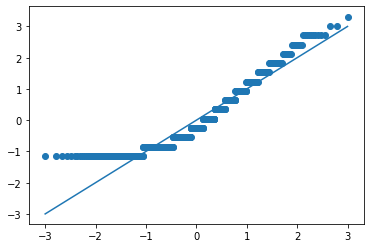

In [13]:
plt.scatter(df["z_theoritical"], df['z_actual'])
plt.plot([-3,-2,-1,0,1,2,3],[-3,-2,-1,0,1,2,3])

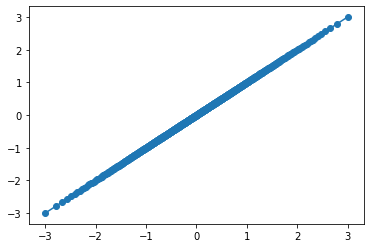

In [14]:
plt.scatter(df["z_theoritical"], df["z_theoritical"])
plt.plot([-3,-2,-1,0,1,2,3],[-3,-2,-1,0,1,2,3])